## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [339]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

#### Genre analysis-what genres are consistent in box office

First we import the csv file to begin analysis of the data 

In [346]:
#import the movie info tsv file
movie_info_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")

#check number of columns and rows
print(movie_info_df.shape)

#print a sample of the data
movie_info_df.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [347]:
#.info to check columns with missing values
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the above information we can see that there is a total of 1560 columns.The columns synopsis,rating,runtime and genre have a few missing data.
On the other hand columns like studio box office write dvd date and theatre date are missing a huge amount of data and the option remaining for these column data would be to drop them since replacing will give very wrong information concerning the movies


In [348]:
#checking for total null values
movie_info_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [349]:
#dropping the null values
movie_info_df = movie_info_df.dropna()

In [350]:
#check for sum of null values again
movie_info_df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

Null values have been dropped data analysis can begin

### What genre is most commonly watched

In [351]:
#most watched genres group by genre by value count
movie_drama = movie_info_df["genre"].value_counts()
print(movie_drama)

# Extract the top N genres and their counts
top_genres = movie_drama.index[:10]
genre_counts_top = movie_drama[:10]


genre
Drama                                                                        33
Comedy                                                                       32
Comedy|Drama                                                                 22
Drama|Mystery and Suspense                                                   11
Comedy|Drama|Romance                                                          9
                                                                             ..
Comedy|Mystery and Suspense                                                   1
Art House and International|Horror|Mystery and Suspense                       1
Art House and International|Comedy|Drama                                      1
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama     1
Action and Adventure|Art House and International                              1
Name: count, Length: 76, dtype: int64


From the above data we can see the most watched top genres with drama being the most watched genre after dorpping null data
but before dropping null data drama was leading in most watched genre by 331 followed by comedy then comedy and drama. This means that this data count
suggests that microsoft should invest mostly in the top 5 genres for a start beginnig with drama movie genre to be able to get viewers from the beginning of movie production.

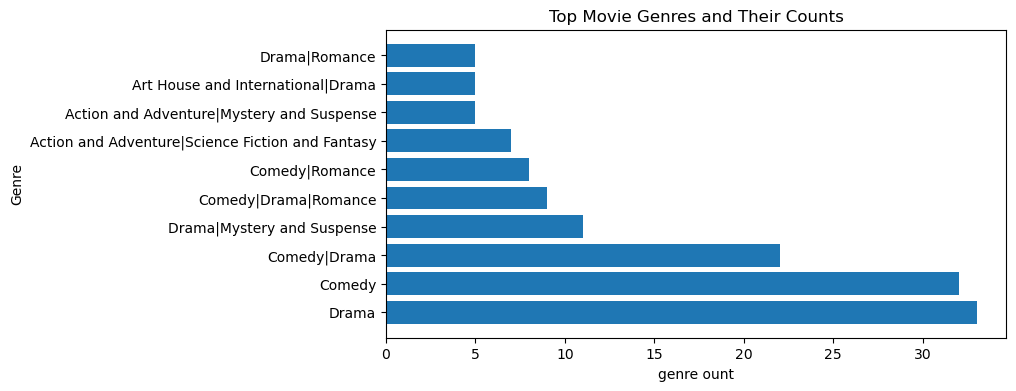

In [358]:
#plotting a graph of top movie genres and their number count
plt.figure(figsize=(8, 4))
plt.barh(top_genres, genre_counts_top)
plt.xlabel('genre ount')
plt.ylabel('Genre')
plt.title('Top Movie Genres and Their Counts')
plt.show()

### Which studio has the highest number of movies

In [359]:
#finding the studio count
movie_studio = movie_info_df["studio"].value_counts()

# Display the studio counts
print(movie_studio)

# Change to the desired n number of top studios
top_studios = movie_studio.index[:10]
studio_counts_top = movie_studio[:10]

studio
Universal Pictures             23
Paramount Pictures             15
Sony Pictures                  12
20th Century Fox               12
Warner Bros. Pictures          11
                               ..
Sony Pictures Entertainment     1
Screen Gems/SONY PICTURES       1
Monterey Media                  1
WB                              1
IDP Distribution                1
Name: count, Length: 101, dtype: int64


This data above shows that universal pictures has the highest number of movie production  followed by paramount pictures then sony pictures and 20th century fox. This explain that there will be a good competition by these four studios in terms of movie production. The higher the number means that there is more preference to these studios in terms of movie production

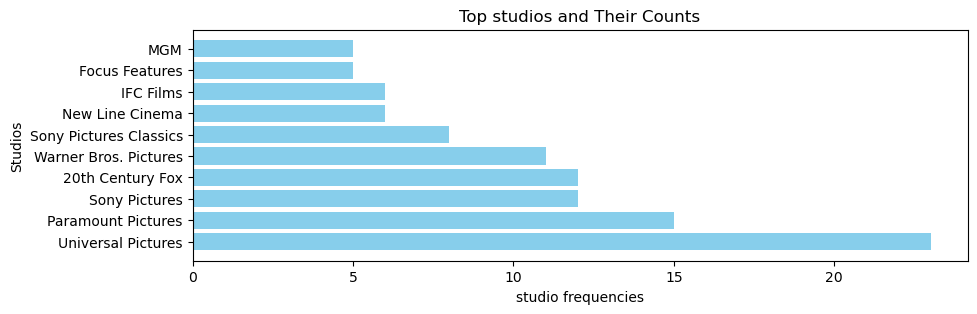

In [360]:
#plotting a graph to show studio preferences against movies
plt.figure(figsize=(10, 3))
plt.barh(top_studios, studio_counts_top, color='skyblue')
plt.xlabel('studio frequencies')
plt.ylabel('Studios')
plt.title('Top studios and Their Counts')
plt.show()

In [151]:
#checking for nulll values
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [366]:
# Convert 'runtime' to string, extract numeric part, fill NaN with 0, and convert to int
stats_runtime = movie_info_df['runtime'].astype(str).str.extract('(\d+)').astype(int)

# Display the DataFrame to find mean median values of runtime
stats_runtime.describe()

,0
count,235.000000
mean,106.663830
std,18.147125
min,67.000000
25%,93.000000
50%,105.000000
75%,117.000000
max,188.000000


This dataframe shows the runtime stats like the mean median and standard deviation. The maximum runtime minutes is 188 minutes while the minimum runtime is 67 minutes, The average runtime minutes is 106 minutes

25th Percentile (Q1): 93 minutes

This means that 25% of the movies in the dataset have a runtime of 93 minutes or les
s.
50th Percentile (Q2 or Median): 105 minues

This is the middle value of the dataset when it is ordered. It separates the lower 50% of runtimes from the upper This meanswords, 50% of the movies have a runtime of 105 minutes or less, and the other 50% have a runtime of 105 minutes or 
more.
75th Percentile (Q3): 117 mnutes

This means that 75% of the movies in the dataset have a runtime of 117 minutes  Judging by this data movies produced by microsost should range between 90 mins and 120 mins or less.

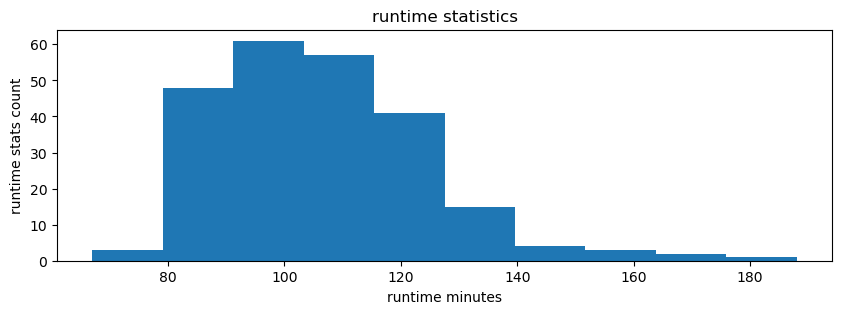

In [371]:
#visualizing the dataframe using a histogram
plt.figure(figsize=(10, 3))
plt.hist(stats_runtime)
plt.xlabel('runtime minutes')
plt.ylabel('runtime stats count')
plt.title('runtime statistics')
plt.show()


The mean and median shows a good number of movies lie around 100minutes meaning more emphasis on making movies that last close to about 100 minutes

In [372]:
#finding ratings count
movie_ratings = movie_info_df["rating"].value_counts()
movie_ratings

rating
R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: count, dtype: int64

This dataset shows that a good number of movies are rated restricted meaning viewers should be over the ag of 17 or 18. A good number of target audience for movies are people aged above 18. Restricted movies are followed closely by PG-13 which means parents strongly cautioned and the movie might be appropriate for users aged below 13. Parental guidance rated movies is third meaning movie might not be suitable for children. This project data then suggests that  a good number of movie watchers are mostly audlts and the comapny should invest more on Restricted movie but also shoul be able to invest in PG-13 rated movies to suit all audiences 

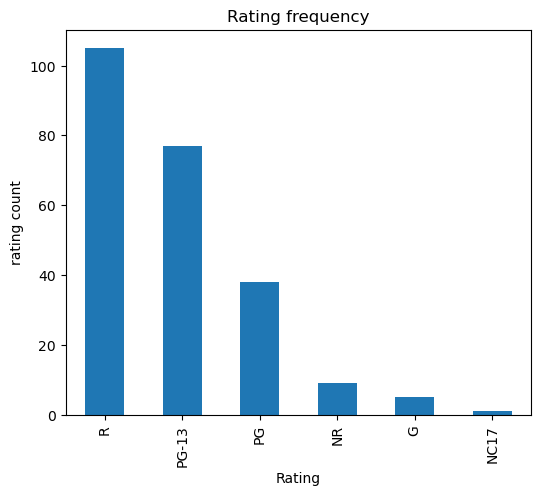

In [374]:
#plot graph of rating against ratings count
plt.figure(figsize=(6, 5))
movie_ratings.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('rating count')
plt.title('Rating frequency')
plt.show()


### Movie budget- What is the cost of producing a movie

##### This part looks at what the company has to spend and what would be gained in domestic stage, international or worldwide and is it making a profit or a loss

In [375]:
#import budgets csv files
budget_df= pd.read_csv("tn.movie_budgets.csv",index_col=0)
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


This data shows production budget for already produced movies domestic gross which is countrywise returns and worlwide returns before budget deductions

In [378]:
#removing $ sign and (,) comma for statistical calculation
budget_df['production_budget'] = budget_df['production_budget'].str.replace('[\$,]', '', regex=True)

budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('[\$,]', '', regex=True)

budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('[\$,]', '', regex=True)
budget_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


The above dataframe shows $ signs and commas removed which would make it easier in calculation

In [379]:
#converting to int64
budget_df['production_budget'] = budget_df['production_budget'].astype('int64')
budget_df['domestic_gross'] = budget_df['domestic_gross'].astype('int64')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype('int64')
budget_df.head(5)
type(budget_df['worldwide_gross'])

pandas.core.series.Series

In [380]:
#calculating international gross
budget_df['international_gross'] = (budget_df['worldwide_gross']) - (budget_df['domestic_gross'])
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,654000000
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,426920914


From the above dataframe we have created a new column international gross to be able to know returns from international countries that is worlwide gross minus the domestic gross. This shows that alot of returns are from international audience 

In [227]:
budget_df["gross_difference"] = (budget_df["international_gross"]) - (budget_df["domestic_gross"])
budget_df.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,gross_difference
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,1255330029
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,563536125
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,64237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,485002227
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,76358983


From the international gross we can find the gross difference between international gross and worldwide gross to ascertain that more returns are from the international audience.

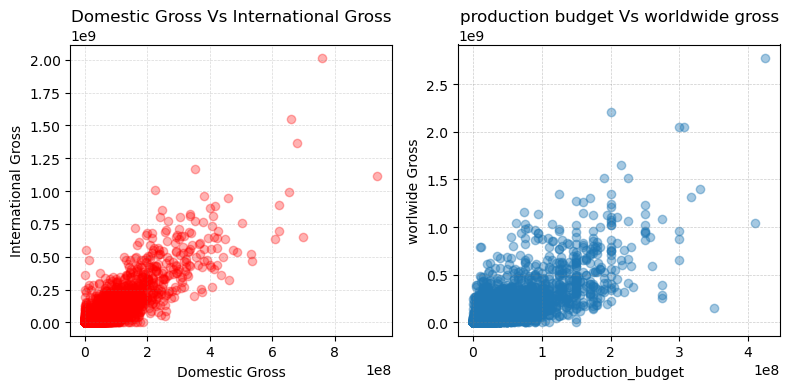

In [382]:
#plotting graphs
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)

# Scatter plot in the first subplot
ax[0].scatter(x=budget_df["domestic_gross"], y=budget_df["international_gross"], alpha=0.3, color='red')
ax[0].set_xlabel("Domestic Gross")
ax[0].set_ylabel("International Gross")
ax[0].set_title("Domestic Gross Vs International Gross")
ax[0].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.3)

# You can add another plot or modify the first one in the second subplot (ax[1]) if needed


ax[1].scatter(x=budget_df["production_budget"], y=budget_df["worldwide_gross"], alpha=0.4)
ax[1].set_xlabel("production_budget")
ax[1].set_ylabel("worlwide Gross")
ax[1].set_title("production budget Vs worldwide gross")
ax[1].grid(color='grey', linestyle='dashed', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()


The above scatter graph shows the relation between domestic gross vs international gross and production budget against worldwide gross. This plot shows  that an increase  in domestic gross will influence an increase in international gross and production budget influences worlwide gross

In [385]:
#calculating profit
budget_df["profits"] = (budget_df['worldwide_gross'])-(budget_df['production_budget'])
budget_df.sort_values(by=["production_budget"])
budget_df.head(5)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,profits
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747


In [450]:
#describing budget_analysis data
budget_analysis = budget_df.describe()
budget_analysis

,production_budget,domestic_gross,worldwide_gross,international_gross,profits
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,5.989970e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,1.460889e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.002376e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-2.189071e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,8.550286e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,6.096850e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09


We then created a profits column to know the estimated avg mean median of different movies

In [389]:
#to know the columns for plotting
print(budget_df.columns)


Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'international_gross', 'profits'],
      dtype='object')


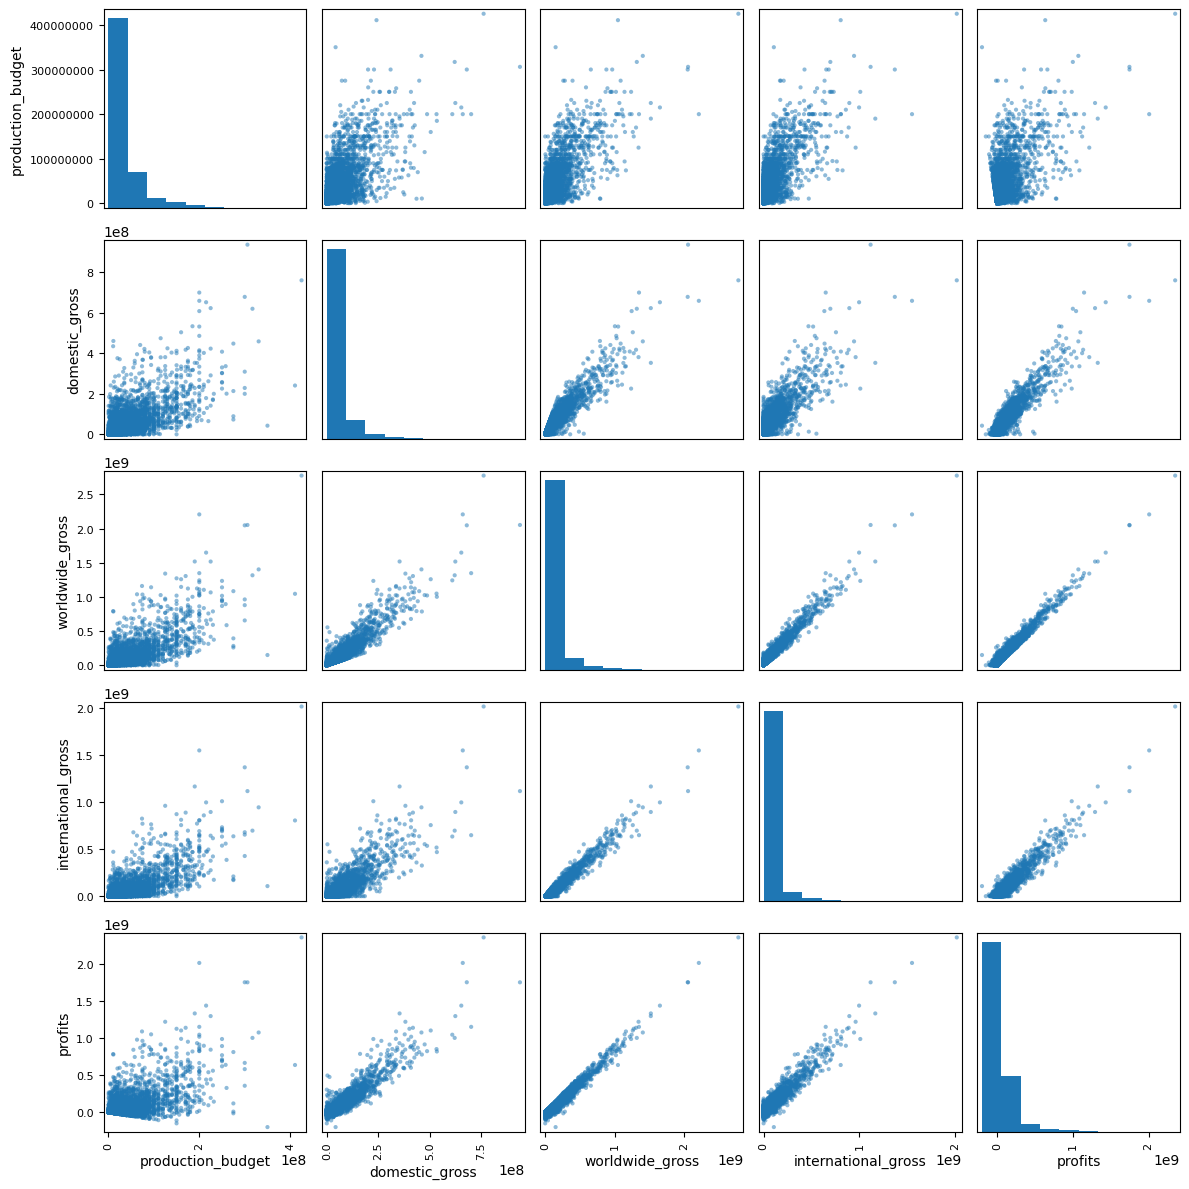

In [401]:
#check for duplicates
budget_df["movie"].duplicated(keep = False).sort_values()
budget_df.head(5)

#plot grpahs for comparison
selected_columns = ['production_budget', 'domestic_gross', 'worldwide_gross', 'international_gross','profits']
scatter_matrix = pd.plotting.scatter_matrix(budget_df[selected_columns], figsize=(12, 12))

plt.tight_layout()

In [404]:
# budget_profit_analysis
profits_analysis = budget_df["profits"].describe()
profits_analysis

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: profits, dtype: float64

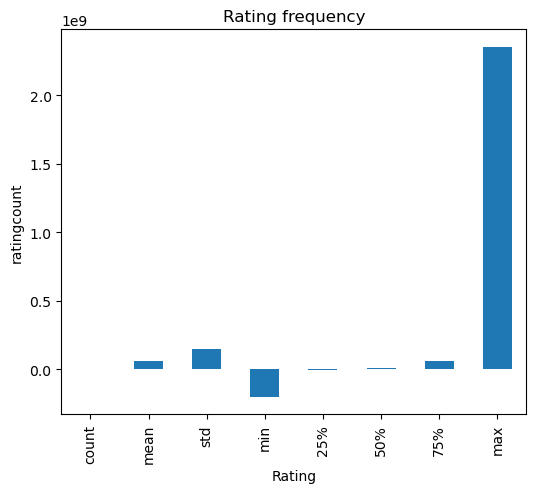

In [451]:
# Plotting
plt.figure(figsize=(6, 5))
profits_analysis.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('ratingcount')
plt.title('Rating frequency')
plt.show()

### Analysing movie gross(domestic vs foreign gross)

In [488]:
gross_df= pd.read_csv("bom.movie_gross.csv",index_col=0)
gross_df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [489]:
gross_df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [490]:
gross_df = gross_df["studio"].value_counts()
gross_df.head(7)

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
Name: count, dtype: int64

In [491]:
gross_df.isna().sum()

0

In [269]:
lang_df= pd.read_csv("tmdb.movies.csv",index_col=0)
print(lang_df.shape)
lang_df.head()

(26517, 9)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [283]:
lang_df_stats = lang_df.describe()
lang_df_stats.drop('id', axis=1, inplace=True)
lang_df_stats

,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000
mean,3.130912,5.991281,194.224837
std,4.355229,1.852946,960.961095
min,0.600000,0.000000,1.000000
25%,0.600000,5.000000,2.000000
50%,1.374000,6.000000,5.000000
75%,3.694000,7.000000,28.000000
max,80.773000,10.000000,22186.000000


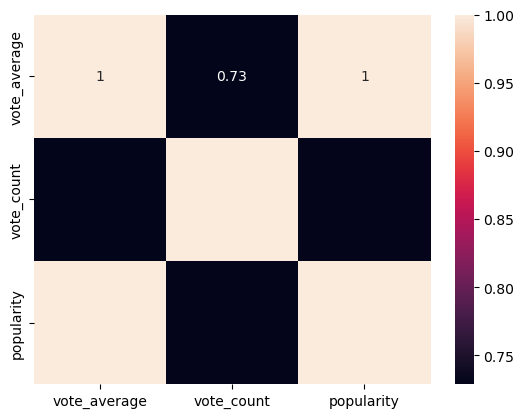

In [459]:
lang_df_corr = lang_df_stats[['vote_average', 'vote_count','popularity']]

#Calculating the correlation matrix using the corr() method
sns.heatmap(lang_df_corr.corr(), annot=True);
plt.show()


### Dataset to analyze successful movies in terms of actors, directors, and other key crew members.

In [289]:
movie_info_df = pd.read_csv("rt.movie_info.tsv", delimiter="\t")
print(movie_info_df.shape)
movie_info_df.head(3)


(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [50]:
print(movie_info_df.isna().sum())
movie_info_df.dropna().head()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [51]:
print(movie_info_df.isna().sum().head())
movie_info_df.info()

id            0
synopsis     62
rating        3
genre         8
director    199
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [52]:
movie_info_df["rating"].value_counts()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

In [53]:
movie_info_df["writer"].value_counts()

writer
Woody Allen                                                4
John Hughes                                                3
Jim Jarmusch                                               3
Sylvester Stallone                                         3
Hong Sang-soo                                              3
                                                          ..
Ben Starr                                                  1
Neil Jordan                                                1
Tonino Guerra|Ennio Flaiano|Giorgio Salvioni|Elio Petri    1
Todd Haynes                                                1
Luc Besson                                                 1
Name: count, Length: 1069, dtype: int64

In [54]:
#fchecking to see if both Steven Speilberg and woody Allen have worked together before
movie_info_df["director"].value_counts()
movie_info_df[(movie_info_df["director"]=='Steven Spielberg') & (movie_info_df["writer"]== "Woody Allen")]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio


In [290]:
movie_info_df_rating = movie_info_df.groupby('rating')['box_office']
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [57]:
reviews_df = pd.read_csv("rt.reviews.tsv", delimiter="\t", encoding='latin1')
print(reviews_df.shape)
reviews_df.head(7)

(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"


In [58]:
print(reviews_df.isna().sum())
reviews_df = reviews_df.dropna().head(50)

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


In [59]:
reviews_df.isna().sum()
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [299]:
reviews_df.dropna()
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [60]:
reviews_df["rating"].value_counts().head()

rating
2/4    8
3/5    4
B      3
3/4    3
4/5    3
Name: count, dtype: int64

In [303]:
reviews_df["publisher"].value_counts().head()

publisher
Reeling Reviews     2
Patrick Nabarro     1
BrianOrndorf.com    1
NECN                1
OK! Magazine        1
Name: count, dtype: int64

### IMDb database analysis

In [304]:
conn = sqlite3.connect("im.db")

#Creating a cursor
cur = conn.cursor()

#Checking the table names of the database
cur.execute("""SELECT name 
FROM sqlite_master 
WHERE type = "table" """)
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [439]:
#selecint data from movie basic table and grouping by year
query = """
SELECT *
FROM movie_basics
GROUP BY start_year,genres;
"""
# Creating a DataFrame and checking the data

table = pd.read_sql(query, conn)
table.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0326592,The Overnight,The Overnight,2010,88.0,None
1,tt0439801,Segurança Nacional,Segurança Nacional,2010,86.0,Action
2,tt1136688,Abelar: Tales of an Ancient Empire,Tales of an Ancient Empire,2010,86.0,"Action,Adventure"
3,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
4,tt1772899,Hell on Wheels,Hell on Wheels,2010,10.0,"Action,Adventure,Biography"
5,tt0861747,Zenitram,Zenitram,2010,103.0,"Action,Adventure,Comedy"
6,tt0480255,The Losers,The Losers,2010,97.0,"Action,Adventure,Crime"
7,tt1567344,Into the Cold: A Journey of the Soul,Into the Cold: A Journey of the Soul,2010,85.0,"Action,Adventure,Documentary"
8,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama"
9,tt0938283,The Last Airbender,The Last Airbender,2010,103.0,"Action,Adventure,Family"


In [435]:
#slecting data from movie basics query
genre_query = """
SELECT *
FROM movie_basics
GROUP BY start_year,genres;
"""
# Creating a DataFrame and checking the data

genre_year = pd.read_sql(genre_query, conn)
table.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0326592,The Overnight,The Overnight,2010,88.0,None
1,tt0439801,Segurança Nacional,Segurança Nacional,2010,86.0,Action
2,tt1136688,Abelar: Tales of an Ancient Empire,Tales of an Ancient Empire,2010,86.0,"Action,Adventure"
3,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
4,tt1772899,Hell on Wheels,Hell on Wheels,2010,10.0,"Action,Adventure,Biography"
5,tt0861747,Zenitram,Zenitram,2010,103.0,"Action,Adventure,Comedy"
6,tt0480255,The Losers,The Losers,2010,97.0,"Action,Adventure,Crime"
7,tt1567344,Into the Cold: A Journey of the Soul,Into the Cold: A Journey of the Soul,2010,85.0,"Action,Adventure,Documentary"
8,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama"
9,tt0938283,The Last Airbender,The Last Airbender,2010,103.0,"Action,Adventure,Family"


In [434]:
#value counts for movie start years
genre_year_plot=genre_year["start_year"].value_counts()
genre_year_plot

start_year
2014    622
2013    606
2015    603
2016    584
2012    574
2017    571
2018    559
2011    558
2010    544
2019    426
2020    151
2021     48
2022     16
2023      4
2024      2
2025      1
2026      1
2027      1
2115      1
Name: count, dtype: int64

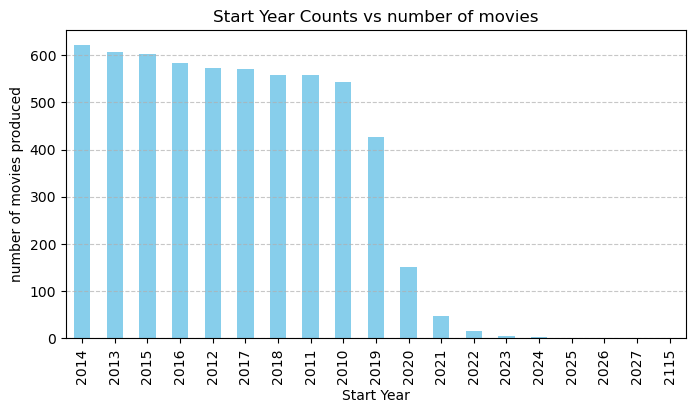

In [306]:
#plotting graph of movie start years and number of movies produced
genre_year_plot.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.xlabel('Start Year')
plt.ylabel('number of movies produced')
plt.title('Start Year Counts vs number of movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the bar graph we see a good number of movies started in 2014 but there has been a decline of movies since then with 2022 recording one of the lowest number of movies

In [433]:
#getting data from movies akas and ordering by region
query0 = """
SELECT *
FROM movie_akas
ORDER BY region,is_original_title;
"""
# Creating a DataFrame and checking the data

table0 = pd.read_sql(query0, conn)
table0.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt6823030,2,"Hilfe, ich hab meine Eltern geschrumpft",None,None,None,None,NaN
1,tt6823030,3,"Help, I've Shrunk My Parents",None,None,None,None,NaN
2,tt10214198,2,Push and Shove,None,None,None,None,0.0
3,tt1418754,2,John Doe,None,None,working,None,0.0
4,tt1582526,3,Collector Gaari Bharya,None,None,None,new title,0.0


In [432]:
#looking for null values
table0.isna().sum()

movie_title              0
region               43836
language             43838
ordering                 0
is_original_title        0
dtype: int64

In [440]:
#querying data from movie akas
query0 = """
SELECT DISTINCT title AS movie_title,region,language,ordering,is_original_title
FROM movie_akas
WHERE is_original_title = "1"
GROUP BY movie_title,region,language
ORDER BY ordering DESC;
"""
# Creating a DataFrame and checking the data

table0 = pd.read_sql(query0, conn)
table0.head(5)

,movie_title,region,language,ordering,is_original_title
0,Harry Potter and the Deathly Hallows: Part 2,None,None,51,1.0
1,Tangled,None,None,49,1.0
2,Furious 6,None,None,48,1.0
3,Jurassic World,None,None,45,1.0
4,Brave,None,None,44,1.0


In [313]:
#checking for null values and dropping them
table0_null=table0.isna().sum()
table0_null=table0.dropna()
# table0.head()

In [449]:
#checking for null values
table0_null.isna().sum()

movie_title          0
region               0
language             0
ordering             0
is_original_title    0
dtype: int64

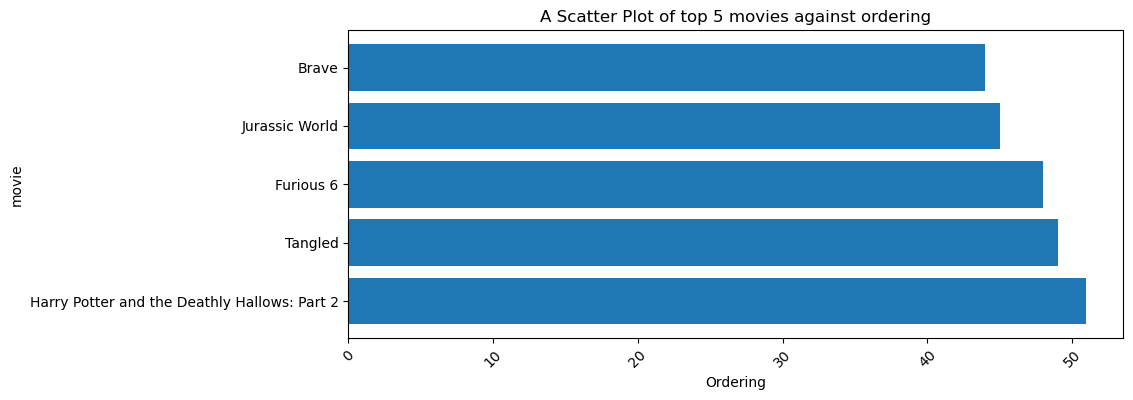

In [448]:
#plotting a graph of top 5 movies and their ordering
fig, ax= plt.subplots(figsize = (10, 4))
plt.barh(table0['movie_title'][:5],table0['ordering'][:5])
plt.xticks(rotation=45)
plt.xlabel('Ordering')
plt.ylabel('movie')
plt.title('A Scatter Plot of top 5 movies against ordering')

# Showing the plot
plt.show();

In [441]:
#slecting data from movie ratings table
query1 = """
SELECT *
FROM movie_ratings;
"""
# Creating a DataFrame and checking the data

table1 = pd.read_sql(query1, conn)
table1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


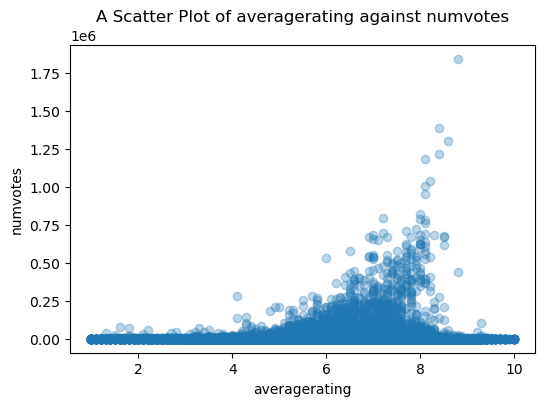

In [431]:
## Setting up the figure and axes
fig, ax = plt.subplots(figsize = (6, 4))

# Plotting the scatter plot
plt.scatter(x=table1['averagerating'], y=table1['numvotes'],alpha=0.3)
#sns.barplot(x=table1['averagerating'], y=table1['numvotes'], color = 'green',alpha=0.5)
plt.xlabel('averagerating')
plt.ylabel('numvotes')
plt.title('A Scatter Plot of averagerating against numvotes')

# Showing the plot
plt.show();

From the scatter plot we can see that alot of movies are mostly between 6 and 8 with a large number of movies being rated 7

In [416]:
#selectin data from movie_akas table ti get average rating of movies
query4 = """
SELECT DISTINCT original_title,movie_akas.ordering,title,averagerating,numvotes,region,genres
FROM movie_akas
JOIN movie_basics
    USING (movie_id)
JOIN movie_ratings
    USING(movie_id)
GROUP BY original_title
ORDER BY numvotes DESC
LIMIT 10;
"""
# Creating a DataFrame and checking the data

table4 = pd.read_sql(query4, conn)
table4.head(50)

,original_title,ordering,title,averagerating,numvotes,region,genres
0,Inception,10,Începutul,8.8,1841066,RO,"Action,Adventure,Sci-Fi"
1,The Dark Knight Rises,10,Vzpon Viteza teme,8.4,1387769,SI,"Action,Thriller"
2,Interstellar,10,Yildizlararasi,8.6,1299334,TR,"Adventure,Drama,Sci-Fi"
3,Django Unchained,10,Zencirsiz Canqo,8.4,1211405,AZ,"Drama,Western"
4,The Avengers,10,The Avengers: Los Vengadores,8.1,1183655,PE,"Action,Adventure,Sci-Fi"
5,The Wolf of Wall Street,10,Volstryto vilkas,8.2,1035358,LT,"Biography,Crime,Drama"
6,Shutter Island,10,Slegta sala,8.1,1005960,LV,"Mystery,Thriller"
7,Guardians of the Galaxy,10,Вартовi Галактики,8.1,948394,UA,"Action,Adventure,Comedy"
8,Deadpool,10,Deadpool,8.0,820847,None,"Action,Adventure,Comedy"
9,The Hunger Games,10,The Hunger Games: Os Jogos da Fome,7.2,795227,PT,"Action,Adventure,Sci-Fi"


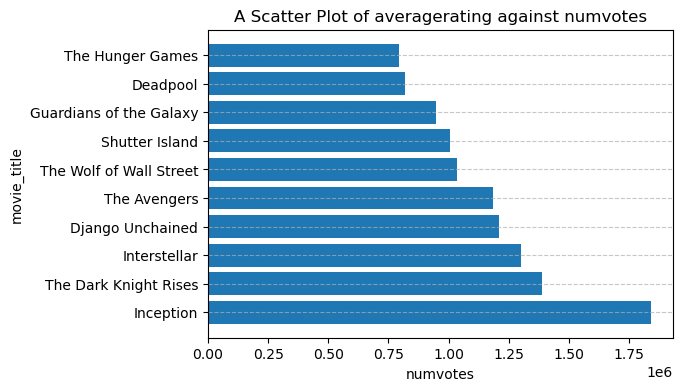

In [417]:
## Setting up the figure and axes
fig, axes= plt.subplots(figsize = (6, 4))

# Plotting the scatter plot
plt.barh( width=table4['numvotes'][:10],y=table4['original_title'][:10])
#sns.barplot(x=table1['averagerating'], y=table1['numvotes'], color = 'green',alpha=0.5)
plt.xlabel('numvotes')
plt.ylabel('movie_title')
plt.title('A Scatter Plot of averagerating against numvotes')
plt.grid(axis='y', linestyle='--', alpha=0.7)


From the graph plotted we can see movies that had alot of votes from watchers with inception being top

In [445]:
#analysis od data from table 4 for statistical calculation
table4_corr = table4.describe()
table4_corr.drop("ordering",axis=1)
table4_corr

,ordering,averagerating,numvotes
count,10.0,10.000000,1.000000e+01
mean,10.0,8.190000,1.152902e+06
std,0.0,0.430633,3.109067e+05
min,10.0,7.200000,7.952270e+05
25%,10.0,8.100000,9.627855e+05
50%,10.0,8.150000,1.109506e+06
75%,10.0,8.400000,1.277352e+06
max,10.0,8.800000,1.841066e+06


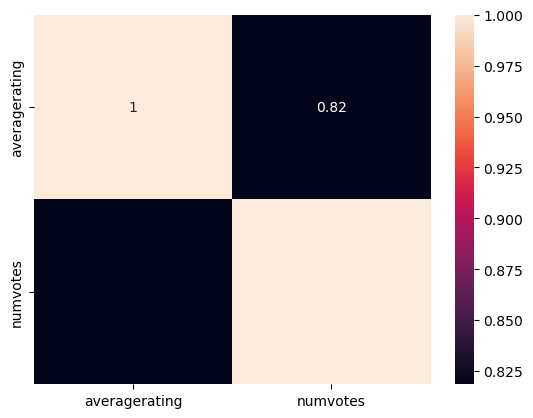

In [446]:
#selectin two variables to compare their correlation
table4_cor = table4[['averagerating', 'numvotes']]

#Calculating the correlation matrix using the corr() method
sns.heatmap(table4_cor.corr(), annot=True);
plt.show()


In [ ]:
"""
From the above correlation map shows the relationship between average rating and num votes
from the graph numvotes with 0.82. This is a postive correlation coefficient suggest 
that as average rating increases there is a tendency for numvotes to increase. 
This suggests a fairly consistent relationship between the two variables. 
When you observe a movie with higher rating there is a likelihood that it has received a higher number of votes
"""